In [33]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

from IPython.core.pylabtools import figsize

import statsmodels.api as sm
from patsy import dmatrix
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import gc

%matplotlib inline

In [36]:
gc.collect()

0

In [28]:
# impute data 가져오기

In [35]:
result_df = pd.read_csv('~/src/train.csv')
result_df.tail()

,Unnamed: 0,R_basementsqft,R_bathroomcnt,R_bedroomcnt,R_calculatedbathnbr,R_calculatedfinishedsquarefeet,R_finishedfloor1squarefeet,R_finishedsquarefeet12,R_finishedsquarefeet13,R_finishedsquarefeet15,...,C_hashottuborspa,C_heatingorsystemtypeid,C_propertycountylandusecode,C_propertylandusetypeid,C_propertyzoningdesc,C_regionidcity,C_regionidcounty,C_regionidneighborhood,C_regionidzip,C_taxdelinquencyflag
90522,162960704,710.664687,2.5,4.0,2.5,2269.0,1279.0,2269.0,1272.046183,3228.013053,...,others,others,1111,261.0,others,51239.0,2061.0,others,others,others
90523,162960769,707.900767,2.0,4.0,2.0,1566.0,1566.0,1566.0,1310.847353,2692.448713,...,others,others,1111,261.0,others,others,2061.0,others,others,others
90524,162960801,749.631268,2.0,4.0,2.0,2302.0,1612.0,2302.0,1346.505382,2499.231136,...,others,others,1111,261.0,others,others,2061.0,others,others,others
90525,162960829,647.956627,2.0,3.0,2.0,1650.0,1650.0,1650.0,1325.715859,2849.932221,...,others,others,1111,261.0,others,others,2061.0,others,others,others
90526,162960842,827.292586,2.5,4.0,2.5,1946.0,981.0,1946.0,1211.704593,3094.078651,...,others,others,1111,261.0,others,others,2061.0,others,others,others


In [38]:
result_df.columns

Index(['Unnamed: 0', 'R_basementsqft', 'R_bathroomcnt', 'R_bedroomcnt',
       'R_calculatedbathnbr', 'R_calculatedfinishedsquarefeet',
       'R_finishedfloor1squarefeet', 'R_finishedsquarefeet12',
       'R_finishedsquarefeet13', 'R_finishedsquarefeet15',
       'R_finishedsquarefeet50', 'R_finishedsquarefeet6', 'R_fireplacecnt',
       'R_fullbathcnt', 'R_garagecarcnt', 'R_garagetotalsqft',
       'R_landtaxvaluedollarcnt', 'R_lotsizesquarefeet', 'R_numberofstories',
       'R_poolcnt', 'R_poolsizesum', 'R_roomcnt',
       'R_structuretaxvaluedollarcnt', 'R_taxamount', 'R_taxvaluedollarcnt',
       'R_threequarterbathnbr', 'R_unitcnt', 'R_yardbuildingsqft17',
       'R_yardbuildingsqft26', 'Z_logerror', 'C_buildingqualitytypeid',
       'C_fips', 'C_hashottuborspa', 'C_heatingorsystemtypeid',
       'C_propertycountylandusecode', 'C_propertylandusetypeid',
       'C_propertyzoningdesc', 'C_regionidcity', 'C_regionidcounty',
       'C_regionidneighborhood', 'C_regionidzip', 'C_taxdel

In [44]:
num_features = ['parcelid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedfloor1squarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'landtaxvaluedollarcnt', 'lotsizesquarefeet', 'numberofstories',
       'poolcnt', 'poolsizesum', 'roomcnt',
       'structuretaxvaluedollarcnt', 'taxamount', 'taxvaluedollarcnt',
       'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17',
       'yardbuildingsqft26']
cat_features = ['buildingqualitytypeid', 'fips', 'hashottuborspa', 'heatingorsystemtypeid',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'taxdelinquencyflag']

['buildingqualitytypeid',
 'fips',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'taxdelinquencyflag']

In [40]:
result_df.columns = features
result_df.tail()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedfloor1squarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,...,hashottuborspa,heatingorsystemtypeid,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag
90522,162960704,710.664687,2.5,4.0,2.5,2269.0,1279.0,2269.0,1272.046183,3228.013053,...,others,others,1111,261.0,others,51239.0,2061.0,others,others,others
90523,162960769,707.900767,2.0,4.0,2.0,1566.0,1566.0,1566.0,1310.847353,2692.448713,...,others,others,1111,261.0,others,others,2061.0,others,others,others
90524,162960801,749.631268,2.0,4.0,2.0,2302.0,1612.0,2302.0,1346.505382,2499.231136,...,others,others,1111,261.0,others,others,2061.0,others,others,others
90525,162960829,647.956627,2.0,3.0,2.0,1650.0,1650.0,1650.0,1325.715859,2849.932221,...,others,others,1111,261.0,others,others,2061.0,others,others,others
90526,162960842,827.292586,2.5,4.0,2.5,1946.0,981.0,1946.0,1211.704593,3094.078651,...,others,others,1111,261.0,others,others,2061.0,others,others,others


In [41]:
features

['parcelid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedfloor1squarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'landtaxvaluedollarcnt',
 'lotsizesquarefeet',
 'numberofstories',
 'poolcnt',
 'poolsizesum',
 'roomcnt',
 'structuretaxvaluedollarcnt',
 'taxamount',
 'taxvaluedollarcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'logerror',
 'buildingqualitytypeid',
 'fips',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'taxdelinquencyflag']

In [51]:
# 회귀분석을 위한 formula 만들기 

formula1 = 'logerror ~ '    
for feature in num_features:
    formula1 += "scale(" + feature + ") + "
formula1 = formula1[:-3]
formula1

'logerror ~ scale(parcelid) + scale(basementsqft) + scale(bathroomcnt) + scale(bedroomcnt) + scale(calculatedbathnbr) + scale(calculatedfinishedsquarefeet) + scale(finishedfloor1squarefeet) + scale(finishedsquarefeet12) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(finishedsquarefeet50) + scale(finishedsquarefeet6) + scale(fireplacecnt) + scale(fullbathcnt) + scale(garagecarcnt) + scale(garagetotalsqft) + scale(landtaxvaluedollarcnt) + scale(lotsizesquarefeet) + scale(numberofstories) + scale(poolcnt) + scale(poolsizesum) + scale(roomcnt) + scale(structuretaxvaluedollarcnt) + scale(taxamount) + scale(taxvaluedollarcnt) + scale(threequarterbathnbr) + scale(unitcnt) + scale(yardbuildingsqft17) + scale(yardbuildingsqft26)'

In [47]:
# 회귀분석을 위한 formula 만들기 

formula2 = 'logerror ~ '    
for feature in cat_features:
    formula2 += "C(" + feature + ") + "
formula2 = formula2[:-3]
formula2

'logerror ~ C(buildingqualitytypeid) + C(fips) + C(hashottuborspa) + C(heatingorsystemtypeid) + C(propertycountylandusecode) + C(propertylandusetypeid) + C(propertyzoningdesc) + C(regionidcity) + C(regionidcounty) + C(regionidneighborhood) + C(regionidzip) + C(taxdelinquencyflag)'

In [53]:
formula = 'logerror ~ scale(parcelid) + scale(basementsqft) + scale(bathroomcnt) + scale(bedroomcnt) \
+ scale(calculatedbathnbr) + scale(calculatedfinishedsquarefeet) + scale(finishedfloor1squarefeet) \
+ scale(finishedsquarefeet12) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) \
+ scale(finishedsquarefeet50) + scale(finishedsquarefeet6) + scale(fireplacecnt) \
+ scale(fullbathcnt) + scale(garagecarcnt) + scale(garagetotalsqft) \
+ scale(landtaxvaluedollarcnt) + scale(lotsizesquarefeet) + scale(numberofstories) \
+ scale(poolcnt) + scale(poolsizesum) + scale(roomcnt) + scale(structuretaxvaluedollarcnt) \
+ scale(taxamount) + scale(taxvaluedollarcnt) + scale(threequarterbathnbr) + scale(unitcnt) \
+ scale(yardbuildingsqft17) + scale(yardbuildingsqft26) \
+ C(buildingqualitytypeid) + C(fips) + C(hashottuborspa) + C(heatingorsystemtypeid) \
+ C(propertycountylandusecode) + C(propertylandusetypeid) + C(propertyzoningdesc) \
+ C(regionidcity) + C(regionidcounty) + C(regionidneighborhood) + C(regionidzip) \
+ C(taxdelinquencyflag)'
formula

'logerror ~ scale(parcelid) + scale(basementsqft) + scale(bathroomcnt) + scale(bedroomcnt) + scale(calculatedbathnbr) + scale(calculatedfinishedsquarefeet) + scale(finishedfloor1squarefeet) + scale(finishedsquarefeet12) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(finishedsquarefeet50) + scale(finishedsquarefeet6) + scale(fireplacecnt) + scale(fullbathcnt) + scale(garagecarcnt) + scale(garagetotalsqft) + scale(landtaxvaluedollarcnt) + scale(lotsizesquarefeet) + scale(numberofstories) + scale(poolcnt) + scale(poolsizesum) + scale(roomcnt) + scale(structuretaxvaluedollarcnt) + scale(taxamount) + scale(taxvaluedollarcnt) + scale(threequarterbathnbr) + scale(unitcnt) + scale(yardbuildingsqft17) + scale(yardbuildingsqft26) + C(buildingqualitytypeid) + C(fips) + C(hashottuborspa) + C(heatingorsystemtypeid) + C(propertycountylandusecode) + C(propertylandusetypeid) + C(propertyzoningdesc) + C(regionidcity) + C(regionidcounty) + C(regionidneighborhood) + C(regionidzip) + 

In [54]:
# 기본 선형회귀모형 만들기

model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()
print(result.rsquared)
print(result.summary())

0.0288211603887
                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     30.50
Date:                Sat, 07 Jul 2018   Prob (F-statistic):               0.00
Time:                        03:58:33   Log-Likelihood:                 38042.
No. Observations:               90527   AIC:                        -7.591e+04
Df Residuals:                   90438   BIC:                        -7.507e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [64]:
len(result_df.columns)

42

In [ ]:
# 변수 변환

# `unitcnt, yardbuildingsqft26, landtaxvaluedollarcnt, taxamount, 
# lotsizesquarefeet, poolsizesum`를 log 취함

In [76]:
formula = 'logerror ~ scale(parcelid) + scale(basementsqft) + scale(bathroomcnt) + scale(bedroomcnt) \
+ scale(calculatedbathnbr) + scale(calculatedfinishedsquarefeet) + scale(finishedfloor1squarefeet) \
+ scale(finishedsquarefeet12) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) \
+ scale(finishedsquarefeet50) + scale(finishedsquarefeet6) + scale(fireplacecnt) \
+ scale(fullbathcnt) + scale(garagecarcnt) + scale(garagetotalsqft) \
+ scale(np.log(landtaxvaluedollarcnt)) + scale(np.log(lotsizesquarefeet)) + scale(numberofstories) \
+ scale(poolcnt) + scale(np.log(poolsizesum)) + scale(roomcnt) + scale(structuretaxvaluedollarcnt) \
+ scale(np.log(taxamount)) + scale(taxvaluedollarcnt) + scale(threequarterbathnbr) + scale(np.log(unitcnt)) \
+ scale(yardbuildingsqft17) + scale(np.log(yardbuildingsqft26)) \
+ C(buildingqualitytypeid) + C(fips) + C(hashottuborspa) + C(heatingorsystemtypeid) \
+ C(propertycountylandusecode) + C(propertylandusetypeid) + C(propertyzoningdesc) \
+ C(regionidcity) + C(regionidcounty) + C(regionidneighborhood) + C(regionidzip) \
+ C(taxdelinquencyflag)'
formula

'logerror ~ scale(parcelid) + scale(basementsqft) + scale(bathroomcnt) + scale(bedroomcnt) + scale(calculatedbathnbr) + scale(calculatedfinishedsquarefeet) + scale(finishedfloor1squarefeet) + scale(finishedsquarefeet12) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(finishedsquarefeet50) + scale(finishedsquarefeet6) + scale(fireplacecnt) + scale(fullbathcnt) + scale(garagecarcnt) + scale(garagetotalsqft) + scale(np.log(landtaxvaluedollarcnt)) + scale(np.log(lotsizesquarefeet)) + scale(numberofstories) + scale(poolcnt) + scale(np.log(poolsizesum)) + scale(roomcnt) + scale(structuretaxvaluedollarcnt) + scale(np.log(taxamount)) + scale(taxvaluedollarcnt) + scale(threequarterbathnbr) + scale(np.log(unitcnt)) + scale(yardbuildingsqft17) + scale(np.log(yardbuildingsqft26)) + C(buildingqualitytypeid) + C(fips) + C(hashottuborspa) + C(heatingorsystemtypeid) + C(propertycountylandusecode) + C(propertylandusetypeid) + C(propertyzoningdesc) + C(regionidcity) + C(regionidcount

In [77]:
# 변수 변환 회귀모형 만들기

model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()
print(result.rsquared)
print(result.summary())

0.0315055370635
                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     33.43
Date:                Sat, 07 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:17:06   Log-Likelihood:                 38167.
No. Observations:               90527   AIC:                        -7.616e+04
Df Residuals:                   90438   BIC:                        -7.532e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [80]:
y.tail()

,logerror
90522,-0.0151
90523,-0.0171
90524,-0.0050
90525,-0.0704
90526,-0.0545


In [81]:
# 아웃라이어 제거

# 1. outlier idx 구하기

X_1_test = X
y_1_test = y

pred = result.predict(X_1_test)
influence_test = result.get_influence()
cooks_d2, pvals = influence_test.cooks_distance
fox_cr = 4 / (len(y_1_test) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

# 아웃라이어 index 얻기
idx = np.hstack([idx, np.where(y_1_test == 50)[0]])
idx

# 2. outlier를 제외한 idx2를 만들어서 idx2만 데이터에서 뽑기
idx2 = list(set(range(len(X_1_test))).difference(idx))
X_1_test = X_1_test.iloc[idx2, :].reset_index(drop=True)
y_1_test = y_1_test.iloc[idx2].reset_index(drop=True)

# 3. 뽑은 데이터 합치고 모델 만들기
X_o = pd.concat([y_1_test, X_1_test], axis=1, join="inner")
X_o.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/quartz/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/quartz/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/quartz/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


,logerror,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedfloor1squarefeet,finishedsquarefeet12,finishedsquarefeet13,...,hashottuborspa,heatingorsystemtypeid,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag
88133,0.0402,162960603,769.252888,2.0,3.0,2.0,1244.0,1244.0,1244.0,1352.136961,...,others,others,others,others,others,others,2061.0,others,97089.0,others
88134,-0.0121,162960629,742.333789,2.5,4.0,2.5,2009.0,993.0,2009.0,1388.778047,...,others,others,1111,261.0,others,51239.0,2061.0,others,others,others
88135,-0.0151,162960704,710.664687,2.5,4.0,2.5,2269.0,1279.0,2269.0,1272.046183,...,others,others,1111,261.0,others,51239.0,2061.0,others,others,others
88136,-0.0171,162960769,707.900767,2.0,4.0,2.0,1566.0,1566.0,1566.0,1310.847353,...,others,others,1111,261.0,others,others,2061.0,others,others,others
88137,-0.0050,162960801,749.631268,2.0,4.0,2.0,2302.0,1612.0,2302.0,1346.505382,...,others,others,1111,261.0,others,others,2061.0,others,others,others


In [82]:
model_test = sm.OLS.from_formula(formula, data=X_o)
result_test = model_test.fit()
print(result_test.rsquared)
print(result_test.summary())

0.0430215571283
                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     52.79
Date:                Sat, 07 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:19:44   Log-Likelihood:                 91960.
No. Observations:               88138   AIC:                        -1.838e+05
Df Residuals:                   88062   BIC:                        -1.831e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

### _VIF_

    1. taxvaluedollarcnt
    2. poolcnt
    3. longitude
    4. latitude
    5. calculatedbathnbr
    6. basementsqft
    7. finishedfloor1squarefeet
    8. poolsizesum
    9. yardbuildingsqft26
    10. calculatedfinishedsquarefeet

In [83]:
formula = 'logerror ~ scale(parcelid) + scale(bathroomcnt) + scale(bedroomcnt) \
+ scale(finishedsquarefeet12) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) \
+ scale(finishedsquarefeet50) + scale(finishedsquarefeet6) + scale(fireplacecnt) \
+ scale(fullbathcnt) + scale(garagecarcnt) + scale(garagetotalsqft) \
+ scale(np.log(landtaxvaluedollarcnt)) + scale(np.log(lotsizesquarefeet)) + scale(numberofstories) \
+ scale(roomcnt) + scale(structuretaxvaluedollarcnt) \
+ scale(np.log(taxamount)) + scale(threequarterbathnbr) + scale(np.log(unitcnt)) \
+ scale(yardbuildingsqft17) \
+ C(buildingqualitytypeid) + C(fips) + C(hashottuborspa) + C(heatingorsystemtypeid) \
+ C(propertycountylandusecode) + C(propertylandusetypeid) + C(propertyzoningdesc) \
+ C(regionidcity) + C(regionidcounty) + C(regionidneighborhood) + C(regionidzip) \
+ C(taxdelinquencyflag)'
formula

'logerror ~ scale(parcelid) + scale(bathroomcnt) + scale(bedroomcnt) + scale(finishedsquarefeet12) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(finishedsquarefeet50) + scale(finishedsquarefeet6) + scale(fireplacecnt) + scale(fullbathcnt) + scale(garagecarcnt) + scale(garagetotalsqft) + scale(np.log(landtaxvaluedollarcnt)) + scale(np.log(lotsizesquarefeet)) + scale(numberofstories) + scale(roomcnt) + scale(structuretaxvaluedollarcnt) + scale(np.log(taxamount)) + scale(threequarterbathnbr) + scale(np.log(unitcnt)) + scale(yardbuildingsqft17) + C(buildingqualitytypeid) + C(fips) + C(hashottuborspa) + C(heatingorsystemtypeid) + C(propertycountylandusecode) + C(propertylandusetypeid) + C(propertyzoningdesc) + C(regionidcity) + C(regionidcounty) + C(regionidneighborhood) + C(regionidzip) + C(taxdelinquencyflag)'

In [84]:
# VIF 적용

model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()
print(result.rsquared)
print(result.summary())

0.0313550782937
                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     36.60
Date:                Sat, 07 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:23:08   Log-Likelihood:                 38160.
No. Observations:               90527   AIC:                        -7.616e+04
Df Residuals:                   90446   BIC:                        -7.540e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

### _교차 검증_ (KFold : 10)

In [65]:
X = result_df.drop(['logerror'], axis=1)
y = result_df.iloc[:,29:30]
len(X), len(y)

(90527, 90527)

In [66]:
len(X.columns), len(y.columns)

(41, 1)

In [69]:
X.tail()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedfloor1squarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,...,hashottuborspa,heatingorsystemtypeid,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag
90522,162960704,710.664687,2.5,4.0,2.5,2269.0,1279.0,2269.0,1272.046183,3228.013053,...,others,others,1111,261.0,others,51239.0,2061.0,others,others,others
90523,162960769,707.900767,2.0,4.0,2.0,1566.0,1566.0,1566.0,1310.847353,2692.448713,...,others,others,1111,261.0,others,others,2061.0,others,others,others
90524,162960801,749.631268,2.0,4.0,2.0,2302.0,1612.0,2302.0,1346.505382,2499.231136,...,others,others,1111,261.0,others,others,2061.0,others,others,others
90525,162960829,647.956627,2.0,3.0,2.0,1650.0,1650.0,1650.0,1325.715859,2849.932221,...,others,others,1111,261.0,others,others,2061.0,others,others,others
90526,162960842,827.292586,2.5,4.0,2.5,1946.0,981.0,1946.0,1211.704593,3094.078651,...,others,others,1111,261.0,others,others,2061.0,others,others,others


parcelid                          int64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedfloor1squarefeet        float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
landtaxvaluedollarcnt           float64
lotsizesquarefeet               float64
numberofstories                 float64
poolcnt                         float64
poolsizesum                     float64
roomcnt                         float64
structuretaxvaluedollarcnt      float64
taxamount                       float64
taxvaluedollarcnt               float64


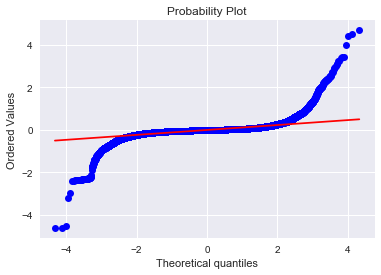

Chi^2       : 63769.607
P-value     :  0.000


In [85]:
# 잔차의 정규성 검정 (QQ plot)

sp.stats.probplot(result.resid, plot=plt)
plt.show()

test = sm.stats.stattools.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [74]:
cv = KFold(10)
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(X)):
    X_train = X.values[train_index]
    y_train = y.values[train_index]
    X_test = X.values[test_index]
    y_test = y.values[test_index]
    
    model = sm.OLS(y, X)
    result = model.fit()
    y_pred = result.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)
scores

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# 변수 변환

formula = 'logerror ~ scale(parcelid) + scale(basementsqft) + scale(bathroomcnt) + scale(bedroomcnt) \
+ scale(calculatedbathnbr) + scale(calculatedfinishedsquarefeet) + scale(finishedfloor1squarefeet) \
+ scale(finishedsquarefeet12) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) \
+ scale(finishedsquarefeet50) + scale(finishedsquarefeet6) + scale(fireplacecnt) \
+ scale(fullbathcnt) + scale(garagecarcnt) + scale(garagetotalsqft) \
+ scale(landtaxvaluedollarcnt) + scale(lotsizesquarefeet) + scale(numberofstories) \
+ scale(poolcnt) + scale(poolsizesum) + scale(roomcnt) + scale(structuretaxvaluedollarcnt) \
+ scale(taxamount) + scale(taxvaluedollarcnt) + scale(threequarterbathnbr) + scale(unitcnt) \
+ scale(yardbuildingsqft17) + scale(yardbuildingsqft26) \
+ C(buildingqualitytypeid) + C(fips) + C(hashottuborspa) + C(heatingorsystemtypeid) \
+ C(propertycountylandusecode) + C(propertylandusetypeid) + C(propertyzoningdesc) \
+ C(regionidcity) + C(regionidcounty) + C(regionidneighborhood) + C(regionidzip) \
+ C(taxdelinquencyflag)'

model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()
print(result.rsquared)
print(result.summary())

In [37]:
y = result_df.iloc[:, -2:-1]
y.tail()

,C_regionidzip
90522,others
90523,others
90524,others
90525,others
90526,others


In [7]:
# 다항회귀와 결정 계수(R^2)의 관계를 볼 수 있는 프로그램(I(x**2) + ...)

def multiregression(feature, N):

    def checker(feature, N):
        formula = 'logerror ~ '    
        for i in range(1, N):
            formula += "scale(I(" + feature + "**" + str(i) + ")) + "
        formula = formula[:-3]

        model = sm.OLS.from_formula(formula, data=result_df)
        result = model.fit()
        return result.rsquared, result.condition_number

    rscore = []
    condition = []

    for i in range(2, N + 2):
        r, c = checker(feature, i)
        print(r, c)
        rscore.append(r)
        condition.append(c)

    y1 = rscore
    y2 = condition

    plt.subplot(211)
    plt.plot(y1)

    plt.subplot(212)
    plt.plot(y2)

    plt.xticks(np.arange(1, N))
    plt.show()

In [8]:
# features

features = ['parcelid', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'threequarterbathnbr', \
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet6', \
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', \
       'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', \
       'latitude', 'longitude', 'lotsizesquarefeet', 'numberofstories', \
       'poolcnt', 'poolsizesum', 'roomcnt', \
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'taxvaluedollarcnt', \
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
features

['parcelid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'threequarterbathnbr',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet6',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'numberofstories',
 'poolcnt',
 'poolsizesum',
 'roomcnt',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'taxvaluedollarcnt',
 'structuretaxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount']

In [9]:
figsize(15, 5)

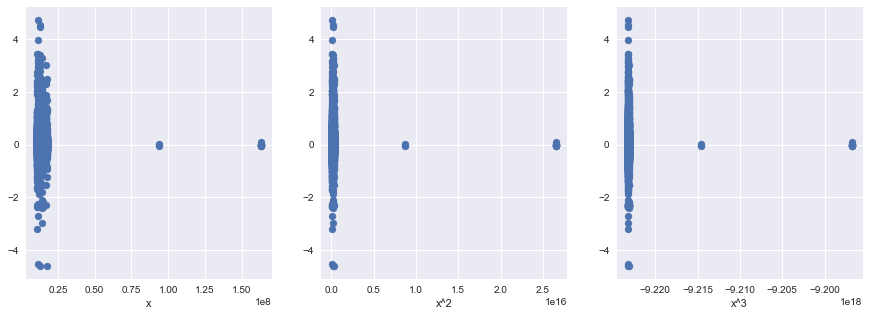

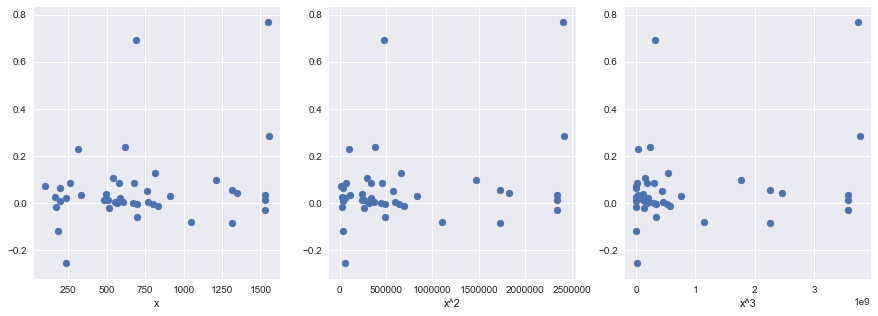

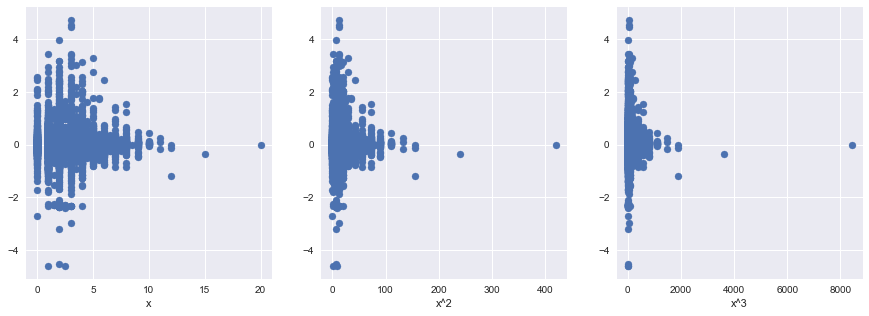

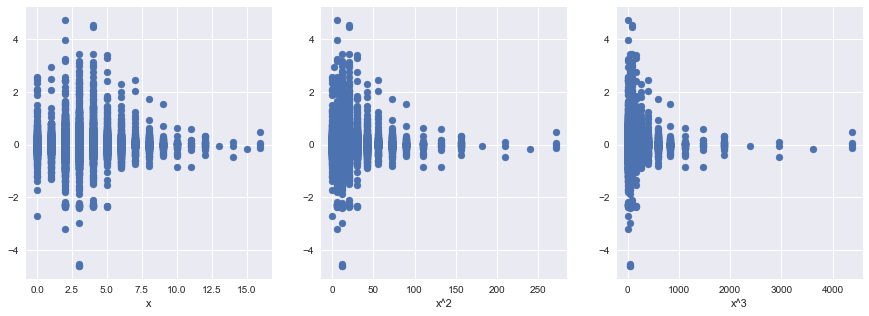

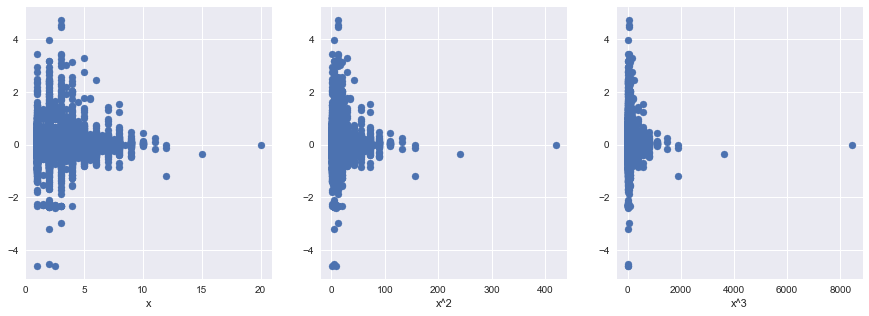

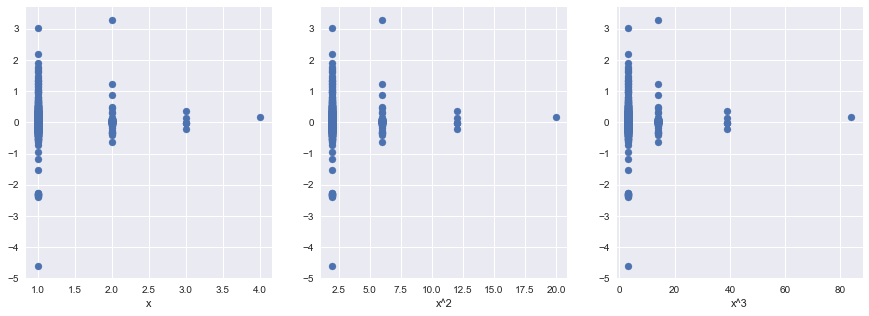

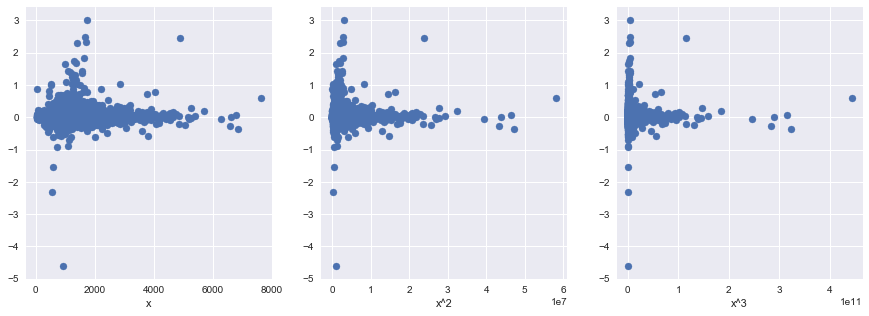

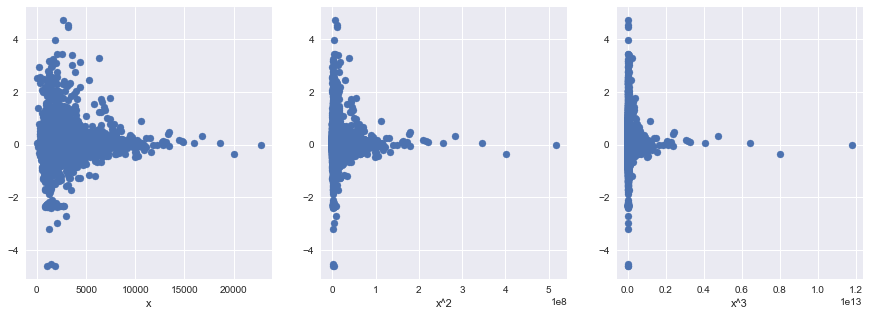

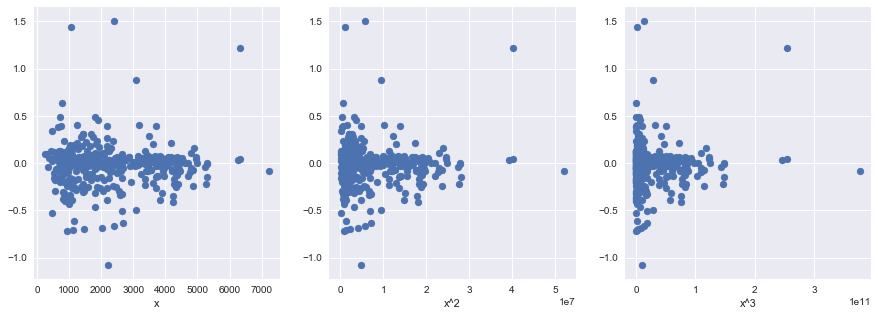

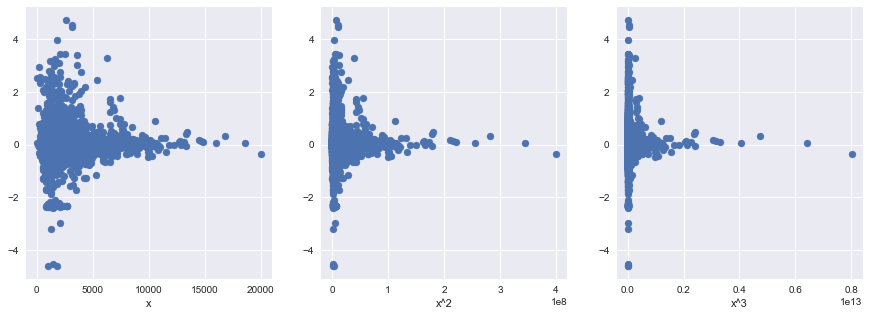

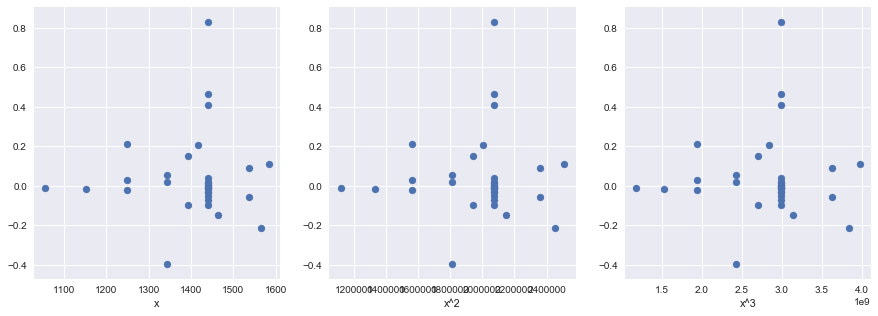

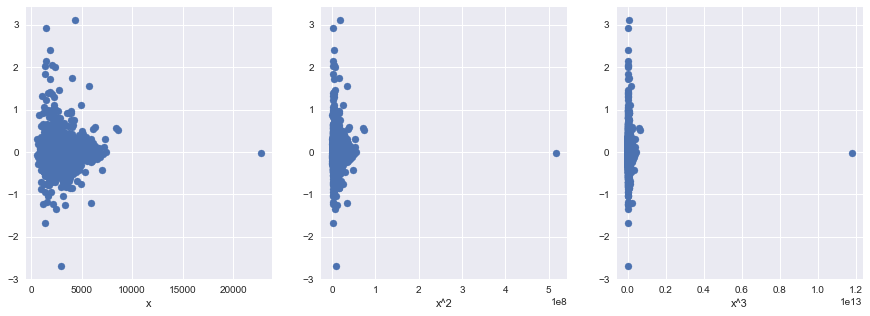

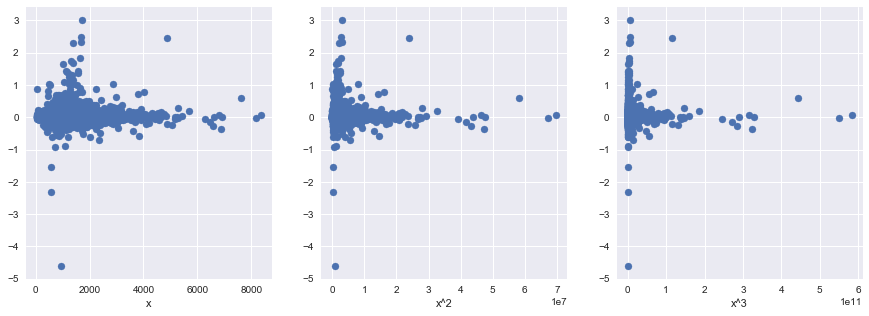

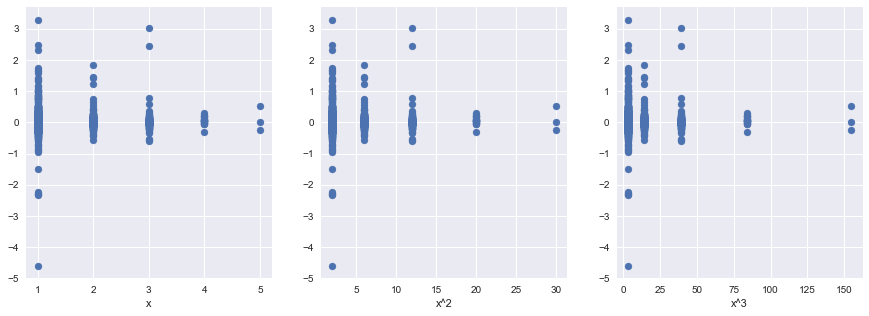

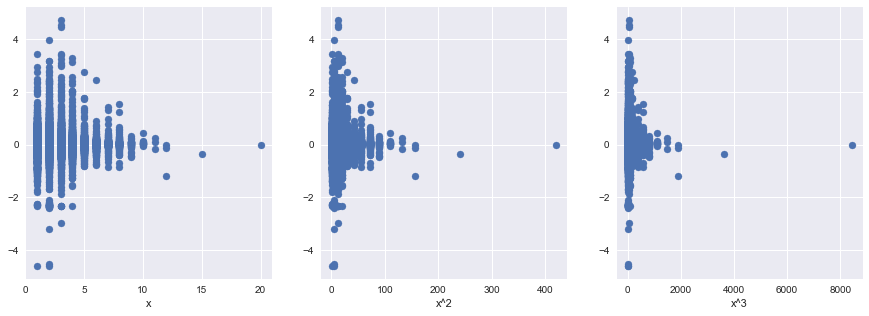

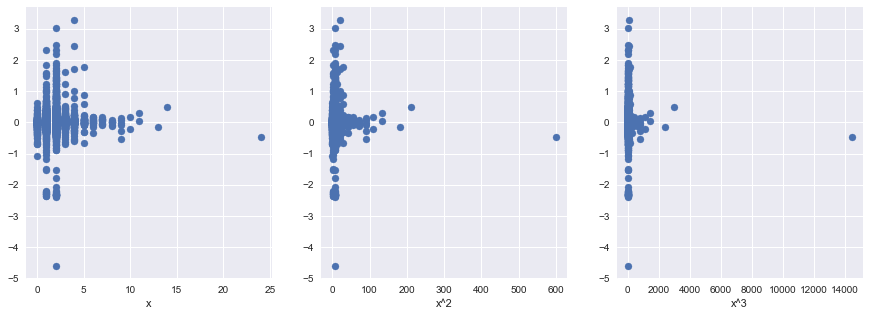

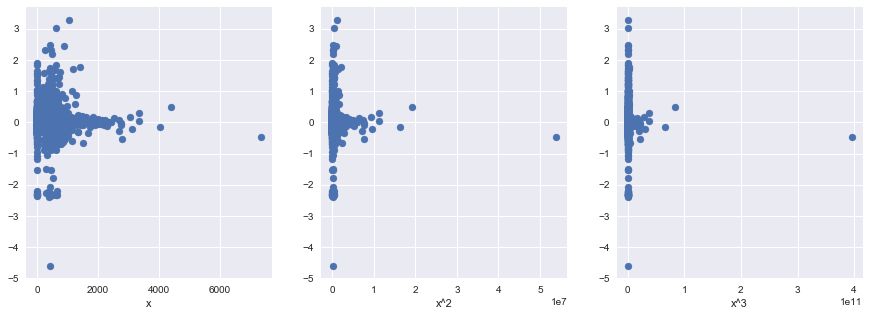

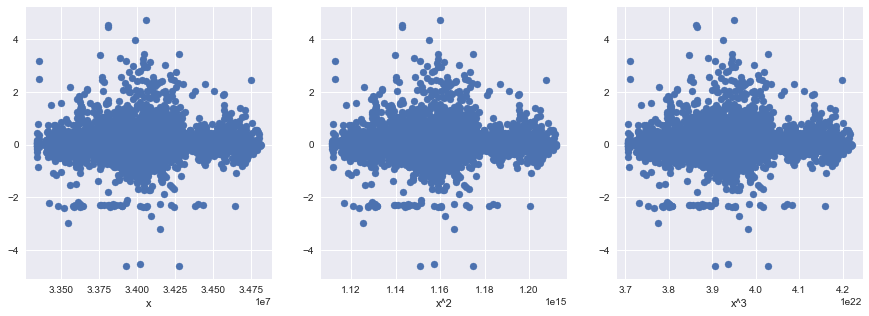

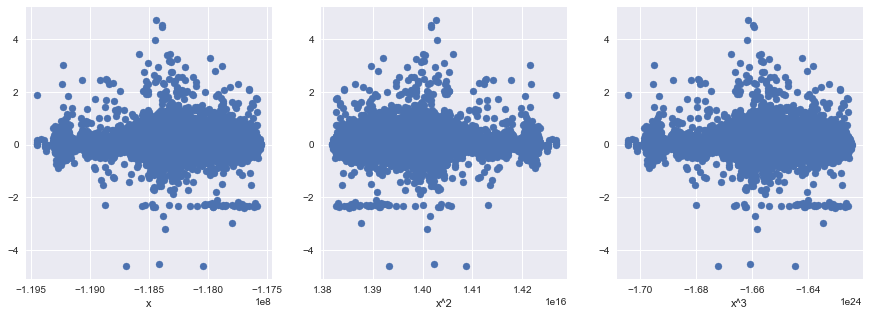

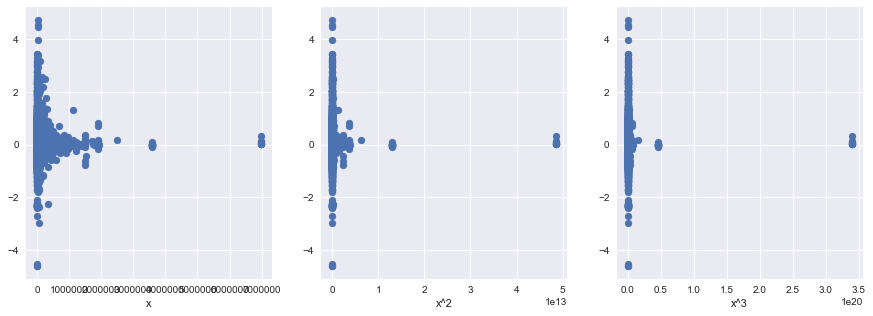

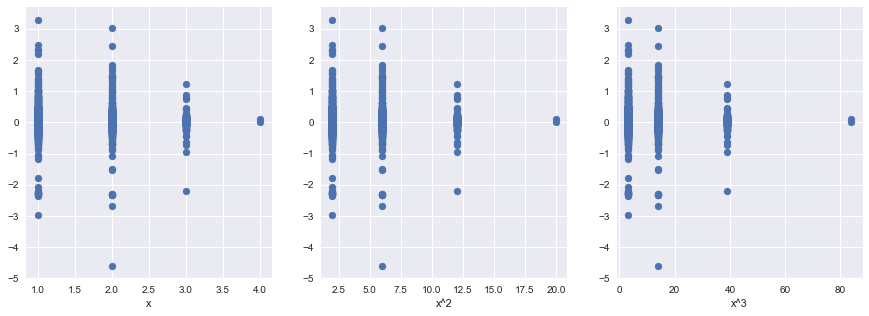

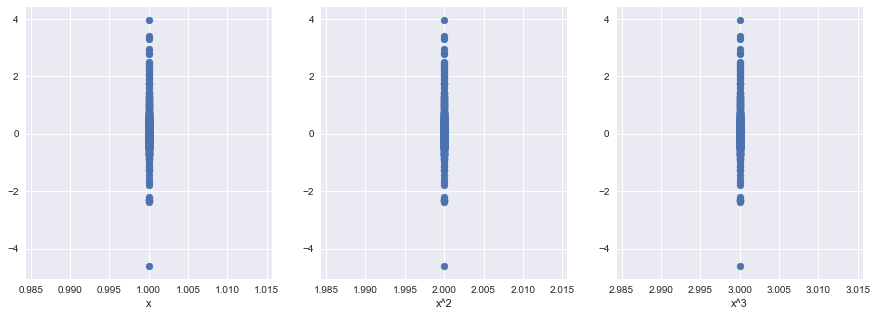

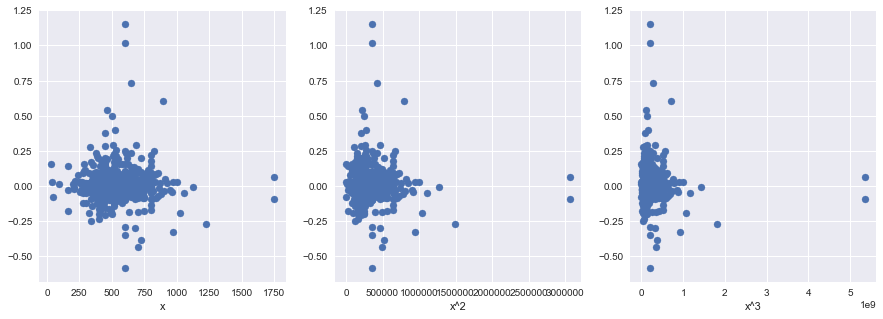

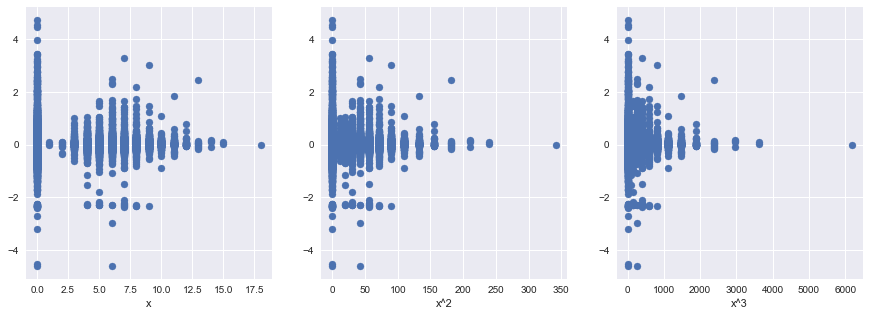

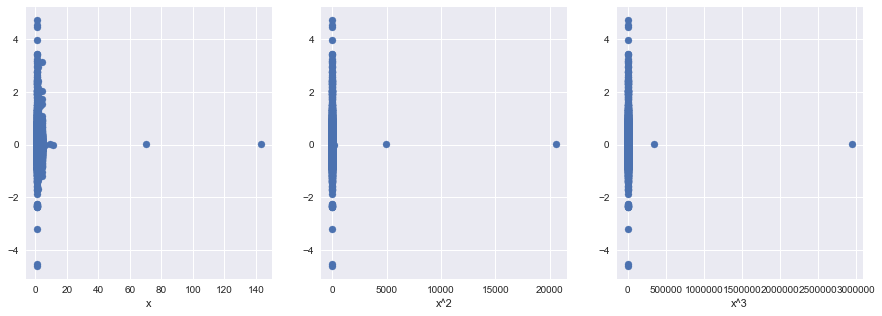

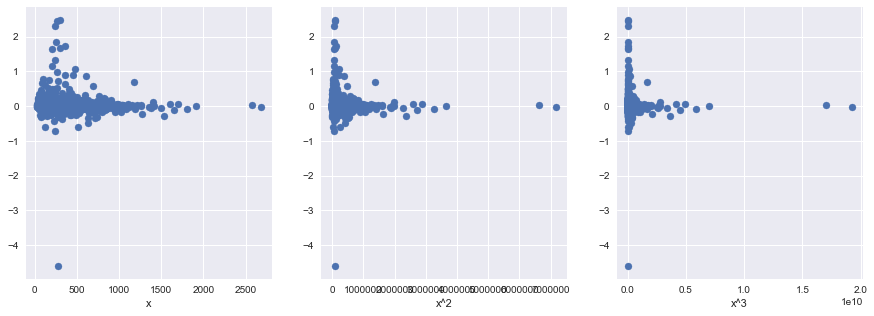

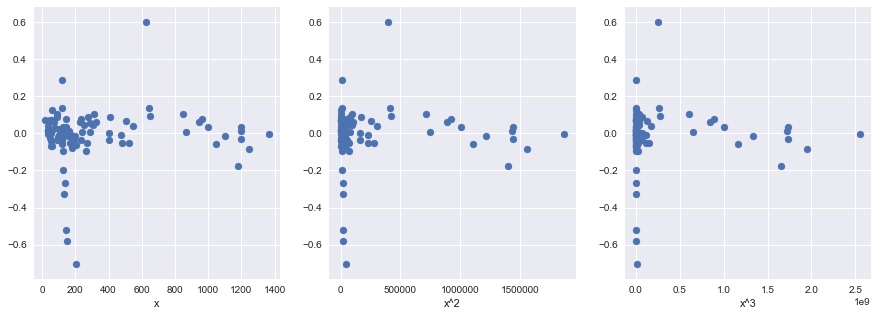

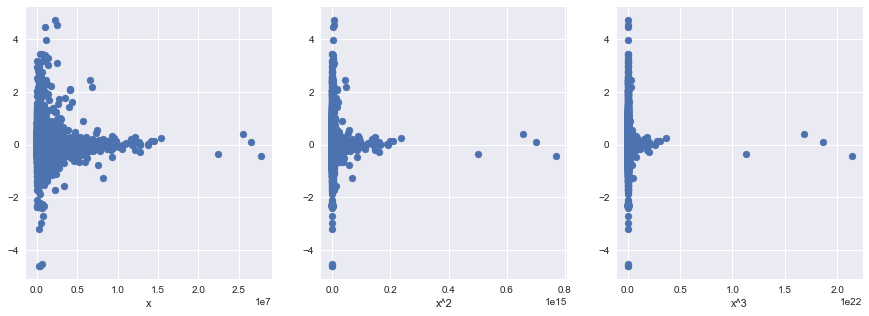

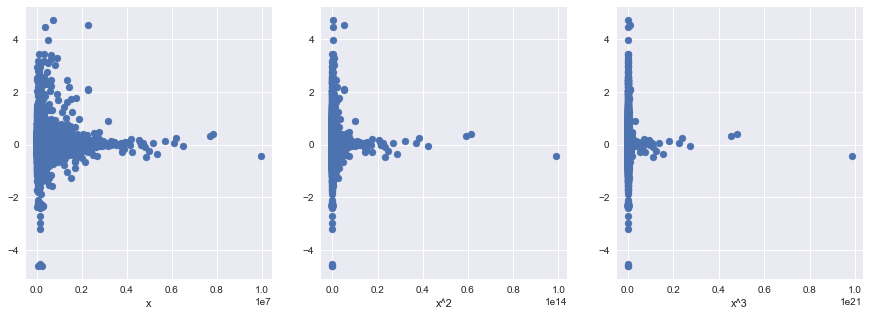

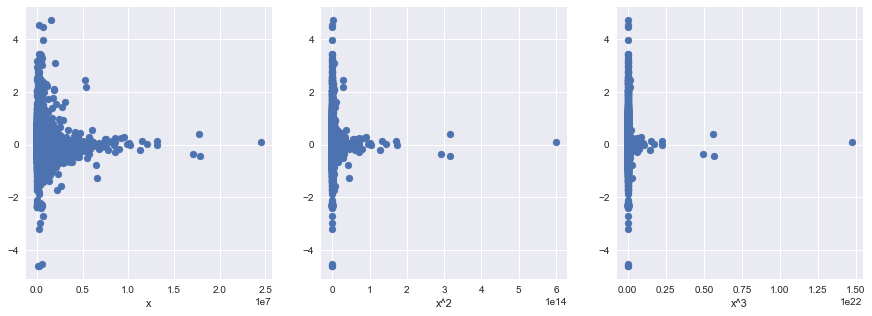

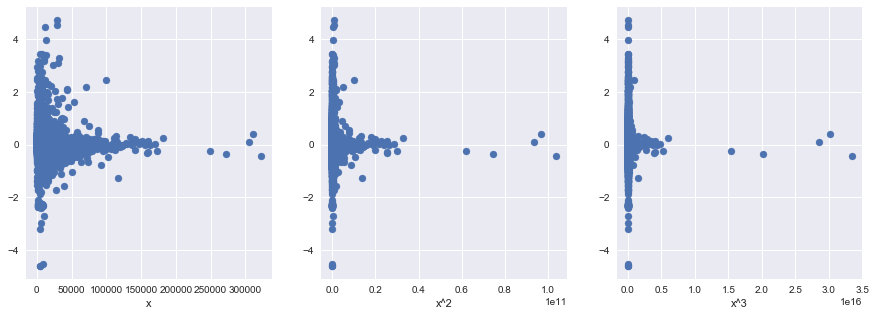

In [10]:
# 다항회귀 후 독립변수(feature)와 종속변수(logerror) 간 스캐터플롯 그리기

for feature in features:
    x = result_df[feature]
    plt.title(feature)
    
    plt.subplot(131)
    plt.xlabel('x')
    plt.scatter(x, y)
        
    plt.subplot(132)
    plt.xlabel('x^2')
    plt.scatter(x + x ** 2, y)
    
    plt.subplot(133)
    plt.xlabel('x^3')
    plt.scatter(x + x ** 2 + x ** 3, y)


    plt.show()

In [11]:
# 변수변환과 결정 계수(R^2)의 관계를 볼 수 있는 프로그램(log)

def multiregression_log(feature, dataset):

    rscore = []
    condition = []

    formula = 'logerror ~ scale(' + feature + ')'
    model_origin = sm.OLS.from_formula(formula, data=dataset)
    result_origin = model_origin.fit()
    rscore.append(result_origin.rsquared)
    condition.append(result_origin.condition_number)
    print("origin : ", result_origin.rsquared, result_origin.condition_number)
    
    formula = 'logerror ~ scale(np.log(' + feature + '))'
    model_origin = sm.OLS.from_formula(formula, data=dataset)
    result_origin = model_origin.fit()
    rscore.append(result_origin.rsquared)
    condition.append(result_origin.condition_number)
    print("log : ", result_origin.rsquared, result_origin.condition_number)

    formula = 'logerror ~ scale(np.log(' + feature + ')) + scale(np.log(I(' + feature + '**2)))'
    model_origin = sm.OLS.from_formula(formula, data=dataset)
    result_origin = model_origin.fit()
    rscore.append(result_origin.rsquared)
    condition.append(result_origin.condition_number)
    print("log2 : ", result_origin.rsquared, result_origin.condition_number)
    
    y1 = rscore
    y2 = condition

    plt.subplot(211)
    plt.plot(y1)

    plt.subplot(212)
    plt.plot(y2)

    plt.xticks(np.arange(1, 3))
    plt.show()

In [12]:
figsize(10, 5)

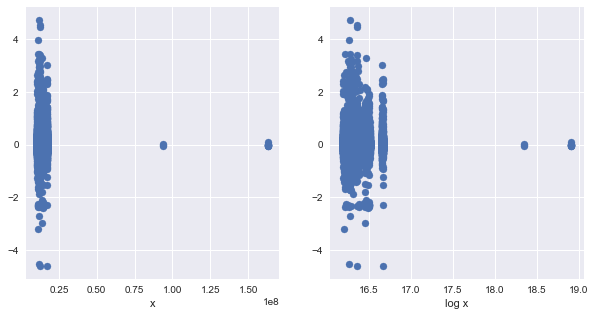

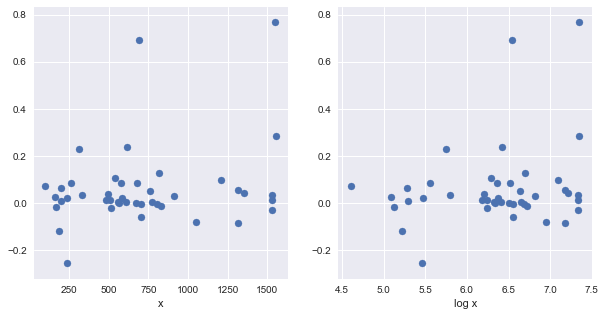

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


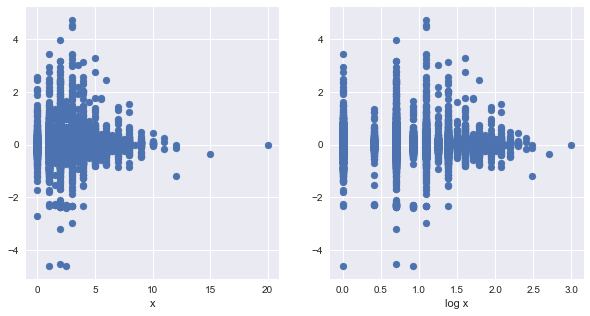

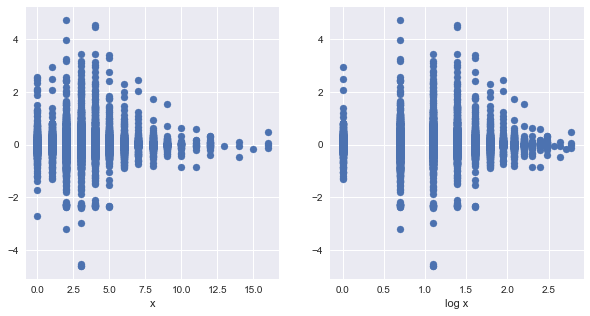

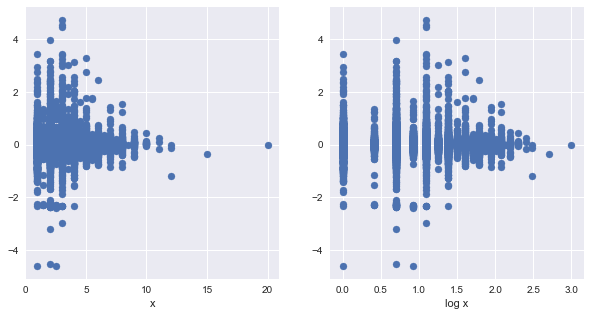

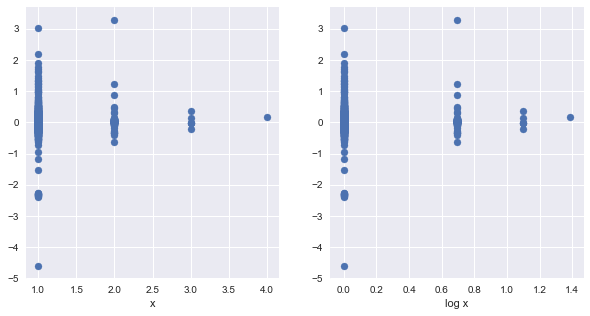

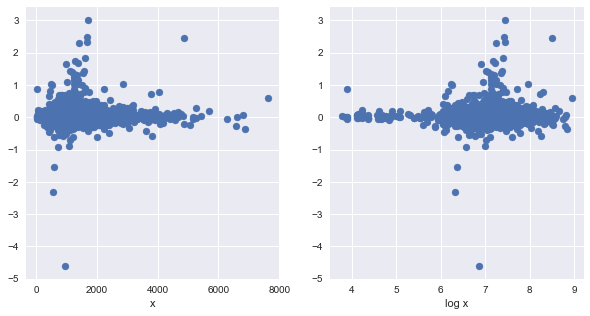

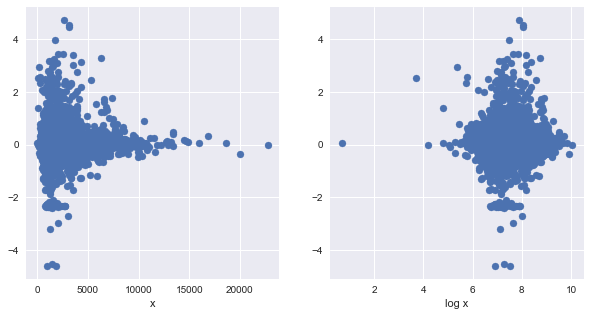

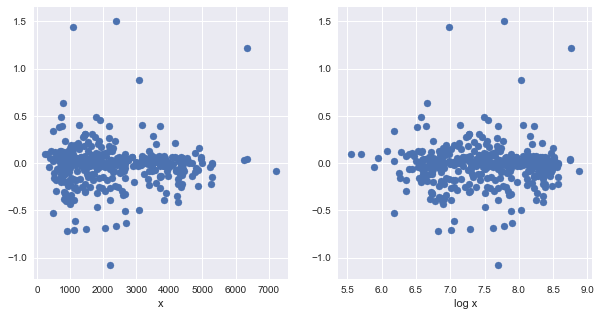

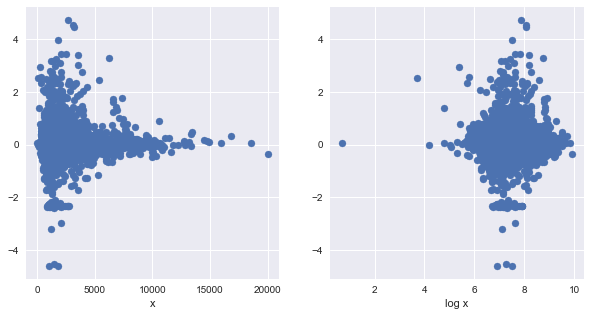

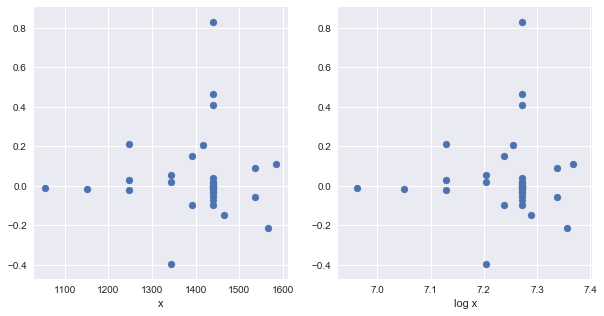

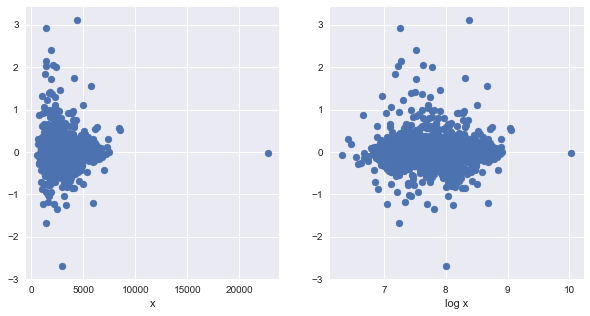

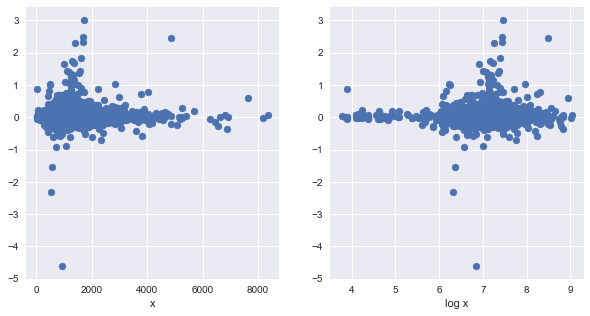

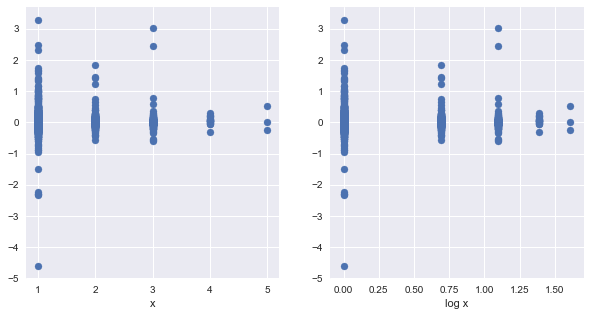

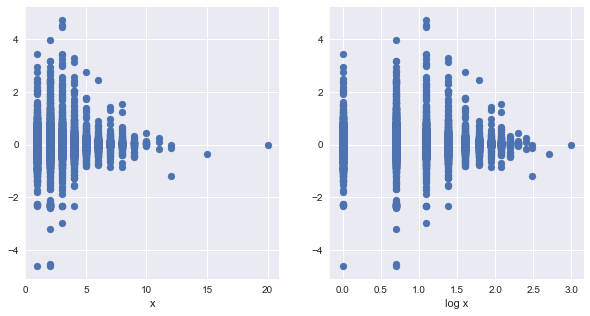

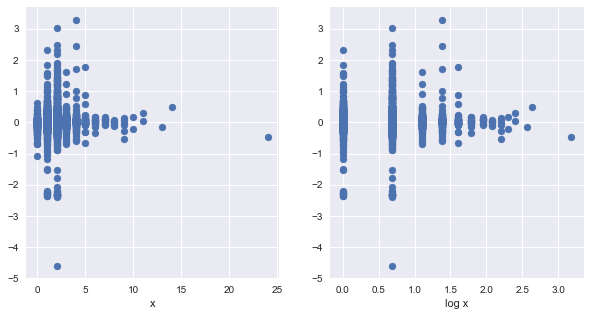

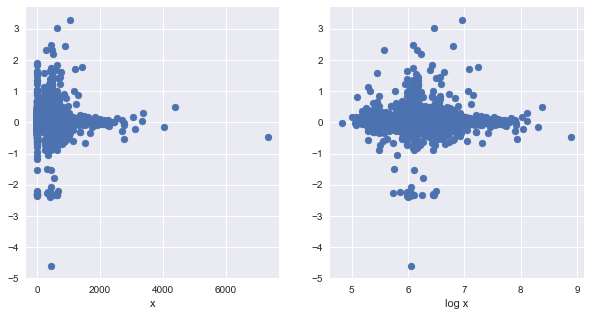

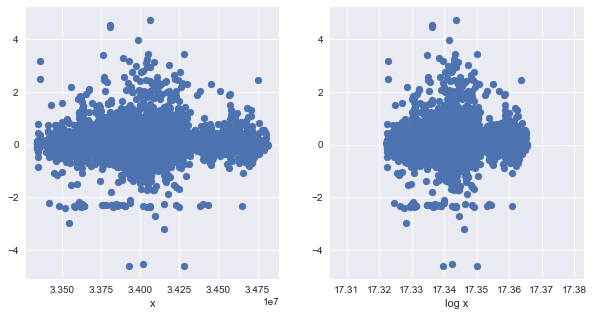

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


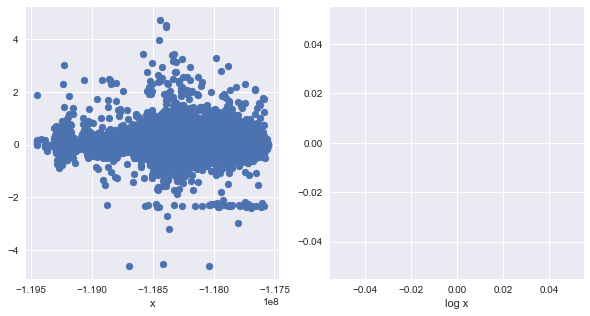

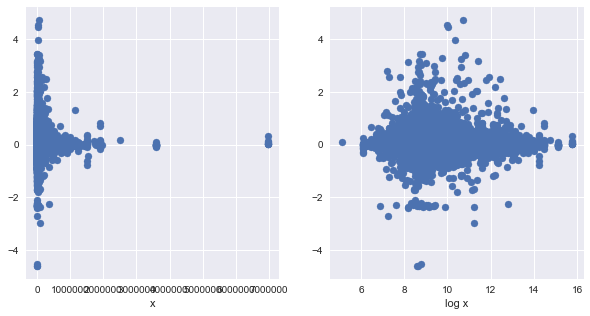

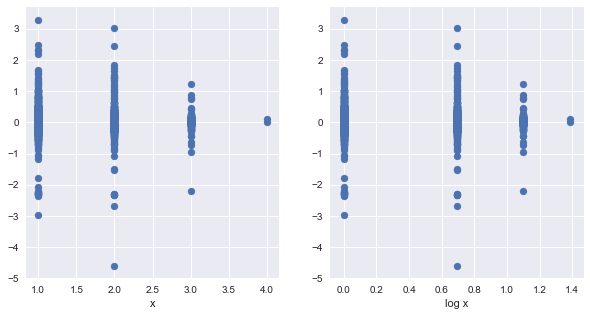

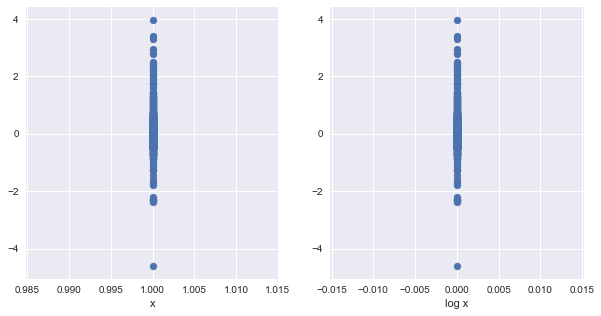

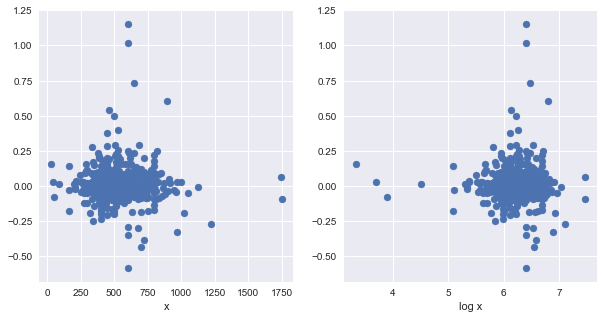

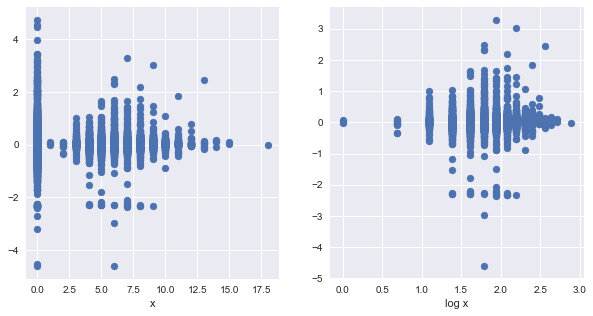

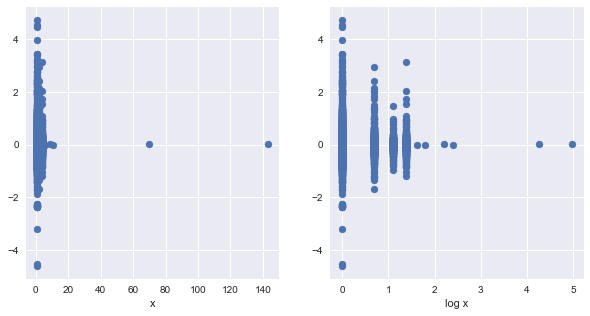

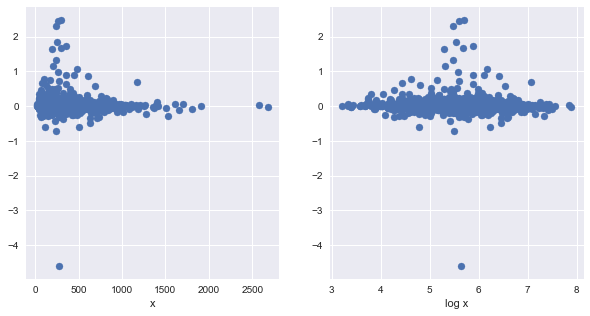

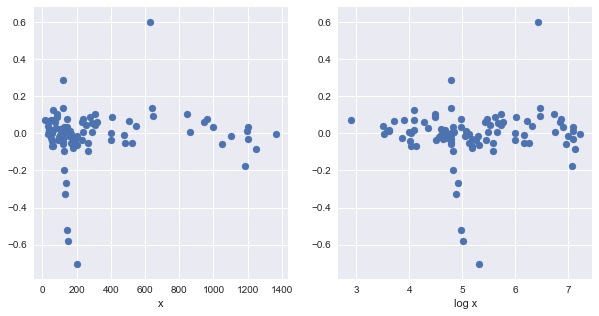

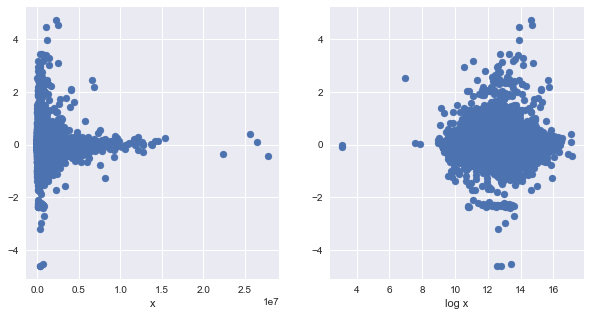

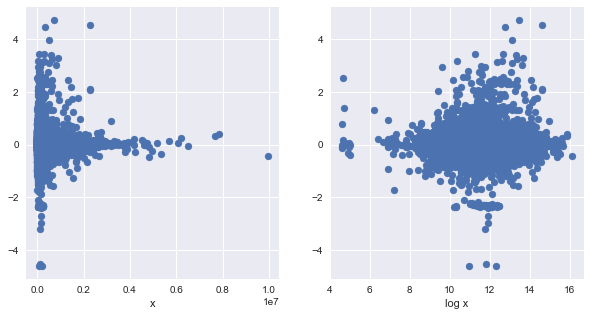

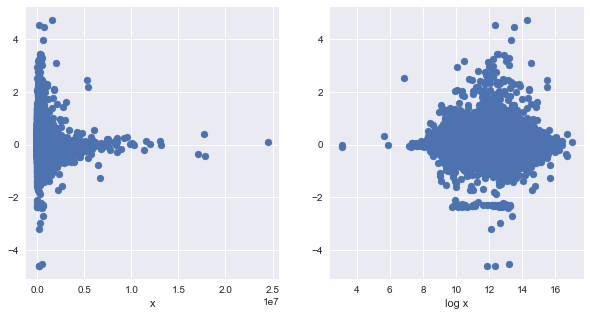

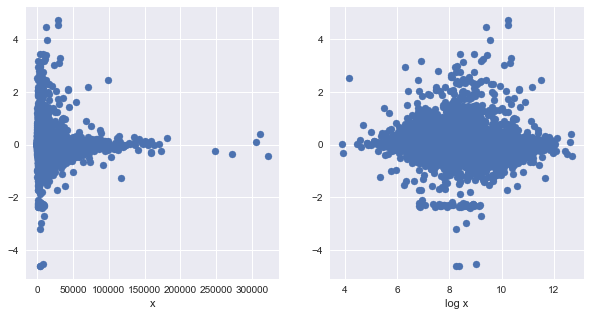

In [13]:
# 변수변환 후 독립변수(feature)와 종속변수(logerror) 간 스캐터플롯 그리기

for feature in features:
    x = result_df[feature]
    plt.title(feature)
    
    plt.subplot(121)
    plt.xlabel('x')
    plt.scatter(x, y)
        
    plt.subplot(122)
    plt.xlabel('log x')
    plt.scatter(np.log(x), y)
    
    plt.show()

In [14]:
result_df.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
90270,11876798,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,...,388582.0,596082.0,2015.0,207500.0,7335.81,NaN,NaN,6.037201e+13,0.0276,2016-04-15
90271,12808516,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,NaN,...,86209.0,178408.0,2015.0,92199.0,2441.74,NaN,NaN,6.037407e+13,-0.1188,2016-06-07
90272,12010248,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,129000.0,420000.0,2015.0,291000.0,5070.41,NaN,NaN,6.037191e+13,0.0843,2016-06-30
90273,14310905,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,389474.0,1215816.0,2015.0,826342.0,12508.30,NaN,NaN,NaN,-0.0050,2016-03-31
90274,14636609,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,237048.0,471286.0,2015.0,234238.0,5470.12,NaN,NaN,NaN,0.0129,2016-09-13


In [15]:
np.log(result_df['bathroomcnt']).corr(result_df['logerror'])

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


nan

In [16]:
# log를 씌웠을 때 상관계수 확인

for feature in features:
    correlation = result_df[feature].corr(result_df['logerror'])
    x = result_df[feature]
    log_correlation = np.log(x).corr(result_df['logerror'])
    print(feature, " : ", correlation)
    print(feature,"_ log : ", log_correlation)
    print('-----')

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


parcelid  :  0.00483736847498
parcelid _ log :  0.00770907405992
-----
basementsqft  :  0.253394675923
basementsqft _ log :  0.231451971507
-----
bathroomcnt  :  0.0278892865508
bathroomcnt _ log :  nan
-----
bedroomcnt  :  0.025467090071
bedroomcnt _ log :  nan
-----
calculatedbathnbr  :  0.0294476853167
calculatedbathnbr _ log :  0.026275708853
-----
threequarterbathnbr  :  0.0340686696641
threequarterbathnbr _ log :  0.0347877002374
-----
finishedfloor1squarefeet  :  0.0262417258925
finishedfloor1squarefeet _ log :  0.0138020694126
-----
calculatedfinishedsquarefeet  :  0.0387840689218
calculatedfinishedsquarefeet _ log :  0.0292702292911
-----
finishedsquarefeet6  :  0.0368469458749
finishedsquarefeet6 _ log :  0.0241924605821
-----
finishedsquarefeet12  :  0.0419223672679
finishedsquarefeet12 _ log :  0.03194567496
-----
finishedsquarefeet13  :  0.0347150011221
finishedsquarefeet13 _ log :  0.0395553241668
-----
finishedsquarefeet15  :  0.0193272820055
finishedsquarefeet15 _ log :

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


taxvaluedollarcnt  :  0.00650799874899
taxvaluedollarcnt _ log :  -0.00297890673682
-----
structuretaxvaluedollarcnt  :  0.0220849701233
structuretaxvaluedollarcnt _ log :  0.00506757703193
-----
landtaxvaluedollarcnt  :  -0.00305103458499
landtaxvaluedollarcnt _ log :  -0.00930922452788
-----
taxamount  :  -0.00667111565411
taxamount _ log :  -0.0281330345856
-----


- finishedsquarefeet13  :  0.0347150011221
- finishedsquarefeet13 _ log :  0.0395553241668
---
- lotsizesquarefeet  :  0.00483524966758
- lotsizesquarefeet _ log :  0.0108086509056
---
- poolsizesum  :  -0.000454168342882
- poolsizesum _ log :  0.00271719256209
---
- unitcnt  :  -0.00398300010363
- unitcnt _ log :  -0.0076509686271

---
- landtaxvaluedollarcnt  :  -0.00305103458499
- landtaxvaluedollarcnt _ log :  -0.00930922452788
---
- taxamount  :  -0.00667111565411
- taxamount _ log :  -0.0281330345856


## _1차 선형회귀 모형 교차 검증_

In [18]:
# 잔차 정규성 검정